# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

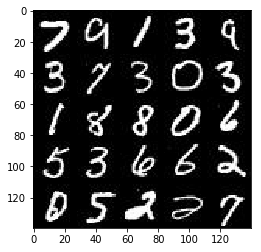

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

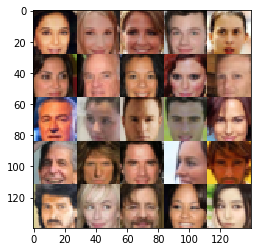

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, 
        shape = (None, image_width, image_height, image_channels))
    input_z = tf.placeholder(tf.float32, 
        shape = (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse = reuse):
        alpha=0.2
        
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        bn1 = tf.layers.batch_normalization(x1, training=True)
        relu1 = tf.maximum(alpha * bn1, bn1)
        # 16x16x128
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x256
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x512

        flat = tf.contrib.layers.flatten(relu3)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('generator', reuse = not is_train):
        
        # First fully connected layer
        x1 = tf.layers.dense(z,  7 * 7 * 512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True)
    
    smoothen = 0.9
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, 
                                                labels = tf.ones_like(d_model_real) * smoothen))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    #Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    #Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(
            d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(
            g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [22]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    input_real, input_z, input_learning_rate = model_inputs(img_width, img_height, img_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, input_learning_rate, beta1)
    
    steps = 0
    print_steps = 10
    image_steps = 100
    training = tf.placeholder(tf.bool)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size = (batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, 
                                               input_learning_rate:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, 
                                               input_learning_rate:learning_rate, training:True})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, 
                                               input_learning_rate:learning_rate, training:False})
                
                if steps % print_steps == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % image_steps == 0:
                    #Print the current image
                    show_generator_output(sess, 50, input_z, img_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0222... Generator Loss: 0.9298
Epoch 1/2... Discriminator Loss: 3.3509... Generator Loss: 0.0849
Epoch 1/2... Discriminator Loss: 2.7792... Generator Loss: 0.1620
Epoch 1/2... Discriminator Loss: 2.6604... Generator Loss: 0.1762
Epoch 1/2... Discriminator Loss: 2.4347... Generator Loss: 0.2212
Epoch 1/2... Discriminator Loss: 2.1556... Generator Loss: 0.3574
Epoch 1/2... Discriminator Loss: 2.1165... Generator Loss: 0.3494
Epoch 1/2... Discriminator Loss: 2.0171... Generator Loss: 0.5269
Epoch 1/2... Discriminator Loss: 1.7783... Generator Loss: 0.4797
Epoch 1/2... Discriminator Loss: 1.7073... Generator Loss: 0.5173


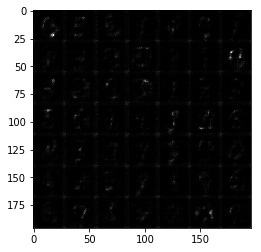

Epoch 1/2... Discriminator Loss: 1.7081... Generator Loss: 0.6546
Epoch 1/2... Discriminator Loss: 1.5513... Generator Loss: 0.6083
Epoch 1/2... Discriminator Loss: 1.6951... Generator Loss: 0.4095
Epoch 1/2... Discriminator Loss: 1.5088... Generator Loss: 0.8644
Epoch 1/2... Discriminator Loss: 1.6018... Generator Loss: 0.4518
Epoch 1/2... Discriminator Loss: 1.6509... Generator Loss: 0.3894
Epoch 1/2... Discriminator Loss: 1.4645... Generator Loss: 0.6639
Epoch 1/2... Discriminator Loss: 1.5108... Generator Loss: 0.5109
Epoch 1/2... Discriminator Loss: 1.4240... Generator Loss: 0.9075
Epoch 1/2... Discriminator Loss: 1.3583... Generator Loss: 0.7577


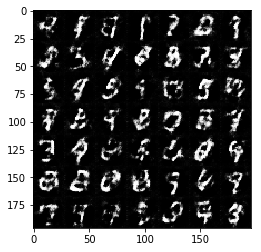

Epoch 1/2... Discriminator Loss: 1.5459... Generator Loss: 0.4355
Epoch 1/2... Discriminator Loss: 1.4109... Generator Loss: 0.8246
Epoch 1/2... Discriminator Loss: 1.6837... Generator Loss: 0.5375
Epoch 1/2... Discriminator Loss: 1.4349... Generator Loss: 0.7041
Epoch 1/2... Discriminator Loss: 1.5894... Generator Loss: 0.4373
Epoch 1/2... Discriminator Loss: 1.5299... Generator Loss: 0.9097
Epoch 1/2... Discriminator Loss: 1.4686... Generator Loss: 0.8242
Epoch 1/2... Discriminator Loss: 1.5634... Generator Loss: 0.7035
Epoch 1/2... Discriminator Loss: 1.5675... Generator Loss: 0.6105
Epoch 1/2... Discriminator Loss: 1.5118... Generator Loss: 0.9585


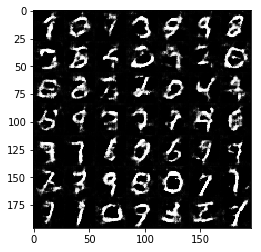

Epoch 1/2... Discriminator Loss: 1.6861... Generator Loss: 0.3566
Epoch 1/2... Discriminator Loss: 1.5761... Generator Loss: 0.8249
Epoch 1/2... Discriminator Loss: 1.4499... Generator Loss: 0.8357
Epoch 1/2... Discriminator Loss: 1.6885... Generator Loss: 0.4067
Epoch 1/2... Discriminator Loss: 1.5727... Generator Loss: 0.9369
Epoch 1/2... Discriminator Loss: 1.6046... Generator Loss: 0.4106
Epoch 1/2... Discriminator Loss: 1.5633... Generator Loss: 1.0198
Epoch 1/2... Discriminator Loss: 1.6456... Generator Loss: 0.4430
Epoch 1/2... Discriminator Loss: 1.5985... Generator Loss: 0.6286
Epoch 1/2... Discriminator Loss: 1.7757... Generator Loss: 0.3334


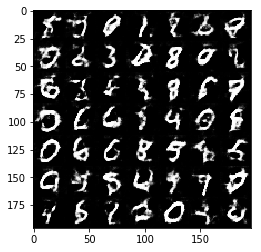

Epoch 1/2... Discriminator Loss: 1.5516... Generator Loss: 0.4951
Epoch 1/2... Discriminator Loss: 1.5457... Generator Loss: 0.5729
Epoch 1/2... Discriminator Loss: 1.6705... Generator Loss: 0.4098
Epoch 1/2... Discriminator Loss: 1.4611... Generator Loss: 0.6379
Epoch 1/2... Discriminator Loss: 1.4244... Generator Loss: 0.6298
Epoch 1/2... Discriminator Loss: 1.5248... Generator Loss: 0.5713
Epoch 1/2... Discriminator Loss: 1.5731... Generator Loss: 0.4609
Epoch 1/2... Discriminator Loss: 1.5755... Generator Loss: 0.4642
Epoch 1/2... Discriminator Loss: 1.5402... Generator Loss: 0.9494
Epoch 1/2... Discriminator Loss: 1.5256... Generator Loss: 0.4942


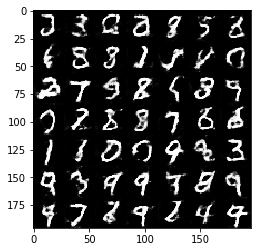

Epoch 1/2... Discriminator Loss: 1.6047... Generator Loss: 0.4305
Epoch 1/2... Discriminator Loss: 1.3680... Generator Loss: 0.6683
Epoch 1/2... Discriminator Loss: 1.4723... Generator Loss: 0.6331
Epoch 1/2... Discriminator Loss: 1.7873... Generator Loss: 0.3590
Epoch 1/2... Discriminator Loss: 1.5312... Generator Loss: 0.5294
Epoch 1/2... Discriminator Loss: 1.5608... Generator Loss: 0.4258
Epoch 1/2... Discriminator Loss: 1.4550... Generator Loss: 0.9319
Epoch 1/2... Discriminator Loss: 1.5922... Generator Loss: 0.4237
Epoch 1/2... Discriminator Loss: 1.4547... Generator Loss: 0.6966
Epoch 1/2... Discriminator Loss: 1.4746... Generator Loss: 0.6958


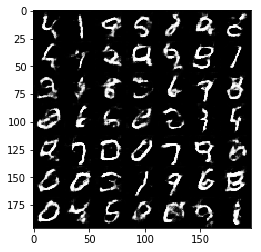

Epoch 1/2... Discriminator Loss: 1.3777... Generator Loss: 0.6758
Epoch 1/2... Discriminator Loss: 1.4809... Generator Loss: 0.4731
Epoch 1/2... Discriminator Loss: 1.5127... Generator Loss: 1.0016
Epoch 1/2... Discriminator Loss: 1.4877... Generator Loss: 0.8076
Epoch 1/2... Discriminator Loss: 1.4969... Generator Loss: 0.9916
Epoch 1/2... Discriminator Loss: 1.5865... Generator Loss: 0.4434
Epoch 1/2... Discriminator Loss: 1.4317... Generator Loss: 0.8931
Epoch 1/2... Discriminator Loss: 1.5216... Generator Loss: 0.6105
Epoch 1/2... Discriminator Loss: 1.4004... Generator Loss: 0.6839
Epoch 1/2... Discriminator Loss: 1.4938... Generator Loss: 0.5891


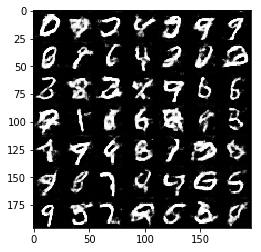

Epoch 1/2... Discriminator Loss: 1.6809... Generator Loss: 0.3687
Epoch 1/2... Discriminator Loss: 1.5385... Generator Loss: 0.5097
Epoch 1/2... Discriminator Loss: 1.4434... Generator Loss: 0.6896
Epoch 1/2... Discriminator Loss: 1.4818... Generator Loss: 0.6985
Epoch 1/2... Discriminator Loss: 1.3549... Generator Loss: 0.6895
Epoch 1/2... Discriminator Loss: 1.5682... Generator Loss: 1.1286
Epoch 1/2... Discriminator Loss: 1.4851... Generator Loss: 0.6248
Epoch 1/2... Discriminator Loss: 1.4399... Generator Loss: 0.8957
Epoch 1/2... Discriminator Loss: 1.4834... Generator Loss: 0.5176
Epoch 1/2... Discriminator Loss: 1.4447... Generator Loss: 0.5927


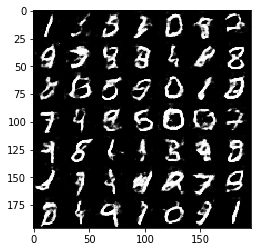

Epoch 1/2... Discriminator Loss: 1.8388... Generator Loss: 1.4785
Epoch 1/2... Discriminator Loss: 1.5000... Generator Loss: 0.7643
Epoch 1/2... Discriminator Loss: 1.4970... Generator Loss: 0.7173
Epoch 1/2... Discriminator Loss: 1.5495... Generator Loss: 0.5441
Epoch 1/2... Discriminator Loss: 1.4889... Generator Loss: 0.5658
Epoch 1/2... Discriminator Loss: 1.4416... Generator Loss: 0.5663
Epoch 1/2... Discriminator Loss: 1.4996... Generator Loss: 0.5599
Epoch 1/2... Discriminator Loss: 1.4984... Generator Loss: 0.6098
Epoch 1/2... Discriminator Loss: 1.5275... Generator Loss: 0.7977
Epoch 1/2... Discriminator Loss: 1.4893... Generator Loss: 0.5118


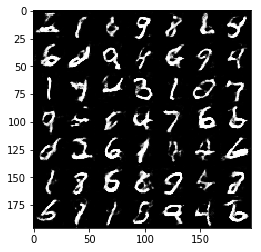

Epoch 1/2... Discriminator Loss: 1.5624... Generator Loss: 0.8516
Epoch 1/2... Discriminator Loss: 1.5258... Generator Loss: 0.5010
Epoch 1/2... Discriminator Loss: 1.4486... Generator Loss: 0.6040
Epoch 2/2... Discriminator Loss: 1.5398... Generator Loss: 0.4855
Epoch 2/2... Discriminator Loss: 1.5583... Generator Loss: 0.5568
Epoch 2/2... Discriminator Loss: 1.5609... Generator Loss: 0.4770
Epoch 2/2... Discriminator Loss: 1.4665... Generator Loss: 0.6184
Epoch 2/2... Discriminator Loss: 1.3452... Generator Loss: 0.9010
Epoch 2/2... Discriminator Loss: 1.5169... Generator Loss: 0.6075
Epoch 2/2... Discriminator Loss: 1.6438... Generator Loss: 0.4169


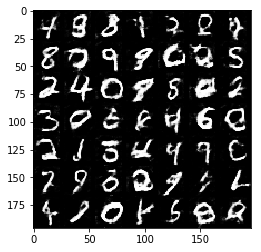

Epoch 2/2... Discriminator Loss: 1.6022... Generator Loss: 0.3958
Epoch 2/2... Discriminator Loss: 1.5062... Generator Loss: 0.5548
Epoch 2/2... Discriminator Loss: 1.4532... Generator Loss: 0.8695
Epoch 2/2... Discriminator Loss: 1.4767... Generator Loss: 0.5777
Epoch 2/2... Discriminator Loss: 1.7363... Generator Loss: 0.3453
Epoch 2/2... Discriminator Loss: 1.4947... Generator Loss: 0.6867
Epoch 2/2... Discriminator Loss: 1.8797... Generator Loss: 0.2890
Epoch 2/2... Discriminator Loss: 1.5240... Generator Loss: 0.4832
Epoch 2/2... Discriminator Loss: 1.4806... Generator Loss: 0.6535
Epoch 2/2... Discriminator Loss: 1.5731... Generator Loss: 0.4682


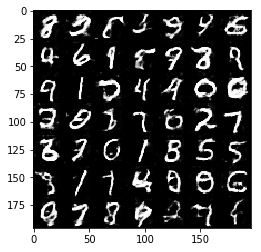

Epoch 2/2... Discriminator Loss: 1.5458... Generator Loss: 0.5219
Epoch 2/2... Discriminator Loss: 1.5422... Generator Loss: 0.7233
Epoch 2/2... Discriminator Loss: 1.4864... Generator Loss: 0.6741
Epoch 2/2... Discriminator Loss: 1.3953... Generator Loss: 0.6299
Epoch 2/2... Discriminator Loss: 1.6412... Generator Loss: 0.3845
Epoch 2/2... Discriminator Loss: 1.5040... Generator Loss: 0.5143
Epoch 2/2... Discriminator Loss: 1.4661... Generator Loss: 0.8762
Epoch 2/2... Discriminator Loss: 1.5325... Generator Loss: 0.8434
Epoch 2/2... Discriminator Loss: 1.4481... Generator Loss: 0.5745
Epoch 2/2... Discriminator Loss: 1.3624... Generator Loss: 0.8998


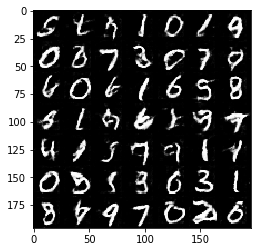

Epoch 2/2... Discriminator Loss: 1.4165... Generator Loss: 0.9993
Epoch 2/2... Discriminator Loss: 1.4102... Generator Loss: 0.6889
Epoch 2/2... Discriminator Loss: 1.6181... Generator Loss: 0.4397
Epoch 2/2... Discriminator Loss: 1.5015... Generator Loss: 0.5898
Epoch 2/2... Discriminator Loss: 1.4090... Generator Loss: 0.6991
Epoch 2/2... Discriminator Loss: 1.4001... Generator Loss: 0.7649
Epoch 2/2... Discriminator Loss: 1.4827... Generator Loss: 0.5452
Epoch 2/2... Discriminator Loss: 1.5997... Generator Loss: 0.5657
Epoch 2/2... Discriminator Loss: 1.4762... Generator Loss: 0.9273
Epoch 2/2... Discriminator Loss: 1.6420... Generator Loss: 0.4225


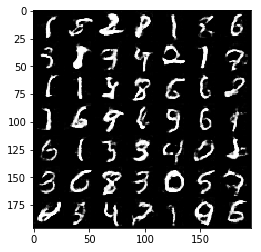

Epoch 2/2... Discriminator Loss: 1.5694... Generator Loss: 0.4173
Epoch 2/2... Discriminator Loss: 1.5692... Generator Loss: 0.4422
Epoch 2/2... Discriminator Loss: 1.3663... Generator Loss: 0.8056
Epoch 2/2... Discriminator Loss: 1.6947... Generator Loss: 1.4650
Epoch 2/2... Discriminator Loss: 1.3758... Generator Loss: 0.8177
Epoch 2/2... Discriminator Loss: 1.5219... Generator Loss: 0.5428
Epoch 2/2... Discriminator Loss: 1.6598... Generator Loss: 1.3141
Epoch 2/2... Discriminator Loss: 1.4165... Generator Loss: 0.9760
Epoch 2/2... Discriminator Loss: 1.3603... Generator Loss: 0.7527
Epoch 2/2... Discriminator Loss: 1.4561... Generator Loss: 0.5638


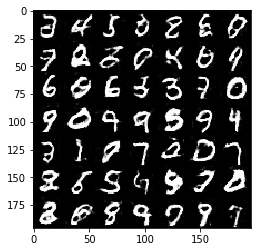

Epoch 2/2... Discriminator Loss: 1.4157... Generator Loss: 0.8560
Epoch 2/2... Discriminator Loss: 1.4918... Generator Loss: 0.5406
Epoch 2/2... Discriminator Loss: 1.5453... Generator Loss: 0.5180
Epoch 2/2... Discriminator Loss: 1.4140... Generator Loss: 0.5547
Epoch 2/2... Discriminator Loss: 1.4429... Generator Loss: 0.6205
Epoch 2/2... Discriminator Loss: 1.6069... Generator Loss: 0.3817
Epoch 2/2... Discriminator Loss: 1.3657... Generator Loss: 0.6697
Epoch 2/2... Discriminator Loss: 1.4314... Generator Loss: 0.6878
Epoch 2/2... Discriminator Loss: 1.5979... Generator Loss: 0.5737
Epoch 2/2... Discriminator Loss: 1.3915... Generator Loss: 0.7389


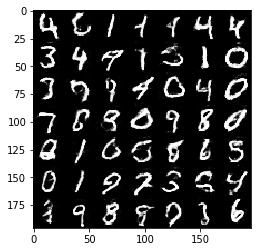

Epoch 2/2... Discriminator Loss: 1.4829... Generator Loss: 0.4944
Epoch 2/2... Discriminator Loss: 1.5375... Generator Loss: 0.4967
Epoch 2/2... Discriminator Loss: 1.3145... Generator Loss: 0.7419
Epoch 2/2... Discriminator Loss: 1.5825... Generator Loss: 0.4229
Epoch 2/2... Discriminator Loss: 1.5646... Generator Loss: 0.3928
Epoch 2/2... Discriminator Loss: 1.6113... Generator Loss: 0.3925
Epoch 2/2... Discriminator Loss: 1.4843... Generator Loss: 0.4874
Epoch 2/2... Discriminator Loss: 1.3379... Generator Loss: 0.8778
Epoch 2/2... Discriminator Loss: 1.4109... Generator Loss: 0.8673
Epoch 2/2... Discriminator Loss: 1.4865... Generator Loss: 0.5073


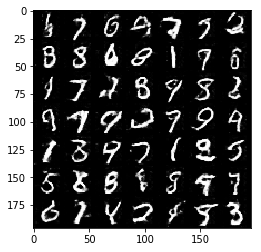

Epoch 2/2... Discriminator Loss: 1.5127... Generator Loss: 0.5262
Epoch 2/2... Discriminator Loss: 1.4242... Generator Loss: 0.7336
Epoch 2/2... Discriminator Loss: 1.4592... Generator Loss: 0.4767
Epoch 2/2... Discriminator Loss: 1.5217... Generator Loss: 1.5043
Epoch 2/2... Discriminator Loss: 1.4627... Generator Loss: 0.5097
Epoch 2/2... Discriminator Loss: 1.5511... Generator Loss: 0.9948
Epoch 2/2... Discriminator Loss: 1.5059... Generator Loss: 0.7577
Epoch 2/2... Discriminator Loss: 1.4863... Generator Loss: 0.5131
Epoch 2/2... Discriminator Loss: 1.6411... Generator Loss: 0.4335
Epoch 2/2... Discriminator Loss: 1.4253... Generator Loss: 0.5904


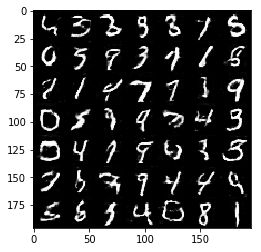

Epoch 2/2... Discriminator Loss: 1.3976... Generator Loss: 0.8692
Epoch 2/2... Discriminator Loss: 1.4458... Generator Loss: 0.5282
Epoch 2/2... Discriminator Loss: 1.5304... Generator Loss: 0.4857
Epoch 2/2... Discriminator Loss: 1.4069... Generator Loss: 0.6836
Epoch 2/2... Discriminator Loss: 1.4851... Generator Loss: 0.6237
Epoch 2/2... Discriminator Loss: 1.5068... Generator Loss: 1.0941
Epoch 2/2... Discriminator Loss: 1.4511... Generator Loss: 0.5693
Epoch 2/2... Discriminator Loss: 1.4219... Generator Loss: 0.8676
Epoch 2/2... Discriminator Loss: 1.3663... Generator Loss: 0.6581
Epoch 2/2... Discriminator Loss: 1.4339... Generator Loss: 0.8774


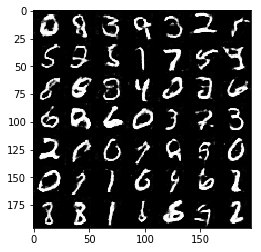

Epoch 2/2... Discriminator Loss: 1.4467... Generator Loss: 0.8336
Epoch 2/2... Discriminator Loss: 1.4869... Generator Loss: 0.5006
Epoch 2/2... Discriminator Loss: 1.4272... Generator Loss: 0.6250
Epoch 2/2... Discriminator Loss: 1.5116... Generator Loss: 0.4687
Epoch 2/2... Discriminator Loss: 1.3169... Generator Loss: 0.8630
Epoch 2/2... Discriminator Loss: 1.3501... Generator Loss: 0.9239


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 5.4215... Generator Loss: 0.0174
Epoch 1/1... Discriminator Loss: 3.8448... Generator Loss: 0.0996
Epoch 1/1... Discriminator Loss: 2.3192... Generator Loss: 0.3895
Epoch 1/1... Discriminator Loss: 3.0281... Generator Loss: 0.1967
Epoch 1/1... Discriminator Loss: 2.9059... Generator Loss: 0.3170
Epoch 1/1... Discriminator Loss: 2.3257... Generator Loss: 0.3893
Epoch 1/1... Discriminator Loss: 2.3762... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 1.8884... Generator Loss: 0.7286
Epoch 1/1... Discriminator Loss: 2.6527... Generator Loss: 0.2943
Epoch 1/1... Discriminator Loss: 2.4802... Generator Loss: 0.2314


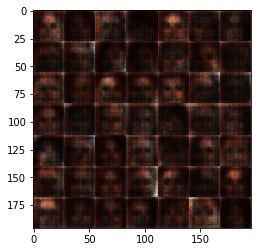

Epoch 1/1... Discriminator Loss: 2.2855... Generator Loss: 0.3858
Epoch 1/1... Discriminator Loss: 2.1661... Generator Loss: 0.4332
Epoch 1/1... Discriminator Loss: 1.9867... Generator Loss: 0.4783
Epoch 1/1... Discriminator Loss: 2.1156... Generator Loss: 0.3945
Epoch 1/1... Discriminator Loss: 2.0116... Generator Loss: 0.4511
Epoch 1/1... Discriminator Loss: 1.6860... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.8283... Generator Loss: 0.5285
Epoch 1/1... Discriminator Loss: 1.7325... Generator Loss: 0.7482
Epoch 1/1... Discriminator Loss: 1.7668... Generator Loss: 0.6355
Epoch 1/1... Discriminator Loss: 1.9796... Generator Loss: 0.4816


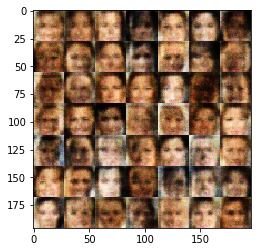

Epoch 1/1... Discriminator Loss: 1.7170... Generator Loss: 0.6147
Epoch 1/1... Discriminator Loss: 1.6732... Generator Loss: 0.5814
Epoch 1/1... Discriminator Loss: 1.8278... Generator Loss: 0.5991
Epoch 1/1... Discriminator Loss: 1.7119... Generator Loss: 0.5151
Epoch 1/1... Discriminator Loss: 1.6838... Generator Loss: 0.5974
Epoch 1/1... Discriminator Loss: 1.7274... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.7544... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.7166... Generator Loss: 0.6216
Epoch 1/1... Discriminator Loss: 1.6865... Generator Loss: 0.6051
Epoch 1/1... Discriminator Loss: 1.6668... Generator Loss: 0.6118


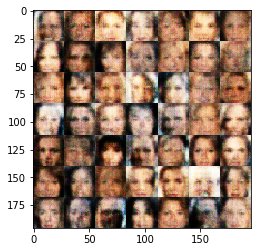

Epoch 1/1... Discriminator Loss: 1.6046... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.6332... Generator Loss: 0.5968
Epoch 1/1... Discriminator Loss: 1.6951... Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 1.6632... Generator Loss: 0.5884
Epoch 1/1... Discriminator Loss: 1.6535... Generator Loss: 0.6037
Epoch 1/1... Discriminator Loss: 1.6406... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.6522... Generator Loss: 0.5495
Epoch 1/1... Discriminator Loss: 1.6812... Generator Loss: 0.6416
Epoch 1/1... Discriminator Loss: 1.5888... Generator Loss: 0.6271
Epoch 1/1... Discriminator Loss: 1.5350... Generator Loss: 0.6610


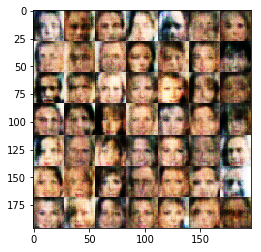

Epoch 1/1... Discriminator Loss: 1.5927... Generator Loss: 0.5950
Epoch 1/1... Discriminator Loss: 1.5997... Generator Loss: 0.6243
Epoch 1/1... Discriminator Loss: 1.5623... Generator Loss: 0.6572
Epoch 1/1... Discriminator Loss: 1.6201... Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.7052
Epoch 1/1... Discriminator Loss: 1.5458... Generator Loss: 0.6939
Epoch 1/1... Discriminator Loss: 1.5799... Generator Loss: 0.6160
Epoch 1/1... Discriminator Loss: 1.4645... Generator Loss: 0.7128
Epoch 1/1... Discriminator Loss: 1.4948... Generator Loss: 0.7314
Epoch 1/1... Discriminator Loss: 1.5399... Generator Loss: 0.6639


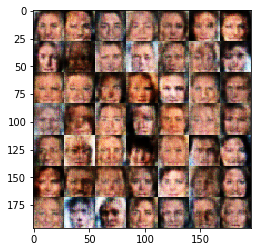

Epoch 1/1... Discriminator Loss: 1.5436... Generator Loss: 0.6971
Epoch 1/1... Discriminator Loss: 1.5758... Generator Loss: 0.6836
Epoch 1/1... Discriminator Loss: 1.5062... Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 1.5868... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 1.5506... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.4652... Generator Loss: 0.7257
Epoch 1/1... Discriminator Loss: 1.4890... Generator Loss: 0.7220
Epoch 1/1... Discriminator Loss: 1.4902... Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.4873... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.5192... Generator Loss: 0.7260


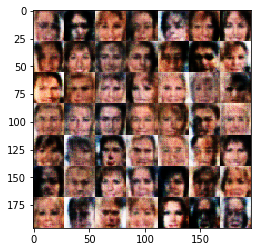

Epoch 1/1... Discriminator Loss: 1.5006... Generator Loss: 0.7163
Epoch 1/1... Discriminator Loss: 1.4879... Generator Loss: 0.7098
Epoch 1/1... Discriminator Loss: 1.4784... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.5335... Generator Loss: 0.6657
Epoch 1/1... Discriminator Loss: 1.4771... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.4897... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.4846... Generator Loss: 0.7447
Epoch 1/1... Discriminator Loss: 1.4759... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 1.5221... Generator Loss: 0.6905


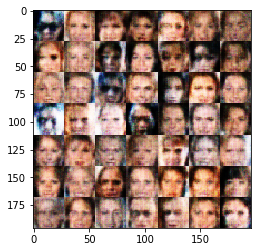

Epoch 1/1... Discriminator Loss: 1.4667... Generator Loss: 0.7202
Epoch 1/1... Discriminator Loss: 1.4425... Generator Loss: 0.7494
Epoch 1/1... Discriminator Loss: 1.5795... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.4980... Generator Loss: 0.7216
Epoch 1/1... Discriminator Loss: 1.4400... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.5239... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 1.5103... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 1.4623... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 1.4919... Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.4851... Generator Loss: 0.6728


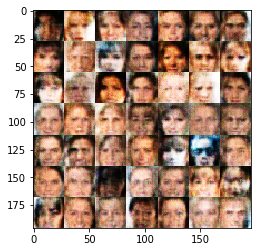

Epoch 1/1... Discriminator Loss: 1.5943... Generator Loss: 0.6980
Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 0.8075
Epoch 1/1... Discriminator Loss: 1.4770... Generator Loss: 0.7024
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 1.5411... Generator Loss: 0.7461
Epoch 1/1... Discriminator Loss: 1.4283... Generator Loss: 0.8267
Epoch 1/1... Discriminator Loss: 1.5047... Generator Loss: 0.7555
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.5387... Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.6865


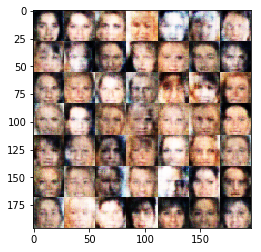

Epoch 1/1... Discriminator Loss: 1.5307... Generator Loss: 0.7203
Epoch 1/1... Discriminator Loss: 1.5292... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.7218
Epoch 1/1... Discriminator Loss: 1.5310... Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 1.4942... Generator Loss: 0.7055
Epoch 1/1... Discriminator Loss: 1.5633... Generator Loss: 0.6996
Epoch 1/1... Discriminator Loss: 1.6017... Generator Loss: 0.6966
Epoch 1/1... Discriminator Loss: 1.5369... Generator Loss: 0.6970


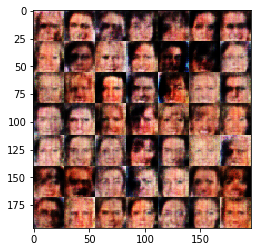

Epoch 1/1... Discriminator Loss: 1.5033... Generator Loss: 0.7441
Epoch 1/1... Discriminator Loss: 1.5611... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.4559... Generator Loss: 0.7090
Epoch 1/1... Discriminator Loss: 1.5116... Generator Loss: 0.6498
Epoch 1/1... Discriminator Loss: 1.4786... Generator Loss: 0.7233
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 0.7020
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 1.4742... Generator Loss: 0.6906
Epoch 1/1... Discriminator Loss: 1.4255... Generator Loss: 0.7101
Epoch 1/1... Discriminator Loss: 1.4580... Generator Loss: 0.8497


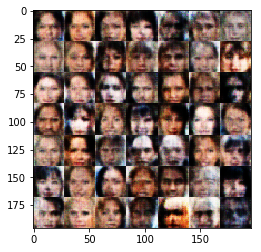

Epoch 1/1... Discriminator Loss: 1.4781... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 1.4170... Generator Loss: 0.7588
Epoch 1/1... Discriminator Loss: 1.4829... Generator Loss: 0.7675
Epoch 1/1... Discriminator Loss: 1.5196... Generator Loss: 0.7054
Epoch 1/1... Discriminator Loss: 1.4837... Generator Loss: 0.6625
Epoch 1/1... Discriminator Loss: 1.4979... Generator Loss: 0.7538
Epoch 1/1... Discriminator Loss: 1.4473... Generator Loss: 0.7161
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 1.4955... Generator Loss: 0.8350


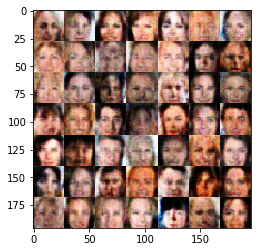

Epoch 1/1... Discriminator Loss: 1.4522... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 1.4832... Generator Loss: 0.6465
Epoch 1/1... Discriminator Loss: 1.4392... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.4235... Generator Loss: 0.7741
Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.8418
Epoch 1/1... Discriminator Loss: 1.4719... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 1.4867... Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.5342... Generator Loss: 0.7458
Epoch 1/1... Discriminator Loss: 1.5446... Generator Loss: 0.6348
Epoch 1/1... Discriminator Loss: 1.4767... Generator Loss: 0.6777


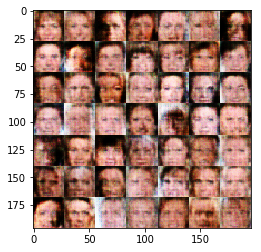

Epoch 1/1... Discriminator Loss: 1.4658... Generator Loss: 0.7251
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 0.7951
Epoch 1/1... Discriminator Loss: 1.4704... Generator Loss: 0.6722
Epoch 1/1... Discriminator Loss: 1.4320... Generator Loss: 0.7230
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 1.4964... Generator Loss: 0.7865
Epoch 1/1... Discriminator Loss: 1.4294... Generator Loss: 0.8319
Epoch 1/1... Discriminator Loss: 1.4446... Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.7585
Epoch 1/1... Discriminator Loss: 1.4605... Generator Loss: 0.7389


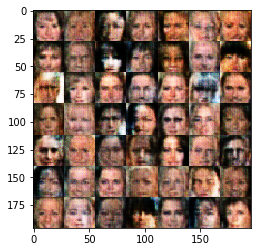

Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.7870
Epoch 1/1... Discriminator Loss: 1.4340... Generator Loss: 0.7099
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.7831
Epoch 1/1... Discriminator Loss: 1.4872... Generator Loss: 0.7075
Epoch 1/1... Discriminator Loss: 1.4396... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 1.5070... Generator Loss: 0.6721
Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 1.4377... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.7842


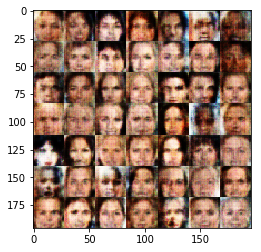

Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.7172
Epoch 1/1... Discriminator Loss: 1.4541... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 1.4490... Generator Loss: 0.7105
Epoch 1/1... Discriminator Loss: 1.4606... Generator Loss: 0.6685
Epoch 1/1... Discriminator Loss: 1.4033... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 1.4406... Generator Loss: 0.7841
Epoch 1/1... Discriminator Loss: 1.4621... Generator Loss: 0.6867
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.8346
Epoch 1/1... Discriminator Loss: 1.4300... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 1.4914... Generator Loss: 0.7232


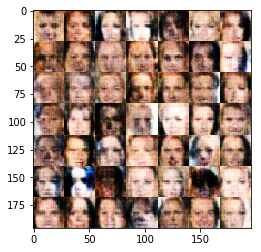

Epoch 1/1... Discriminator Loss: 1.4729... Generator Loss: 0.7241
Epoch 1/1... Discriminator Loss: 1.5623... Generator Loss: 0.7219
Epoch 1/1... Discriminator Loss: 1.4482... Generator Loss: 0.6613
Epoch 1/1... Discriminator Loss: 1.5170... Generator Loss: 0.6849
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.4765... Generator Loss: 0.7397
Epoch 1/1... Discriminator Loss: 1.4899... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.4981... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.5148... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.5269... Generator Loss: 0.6695


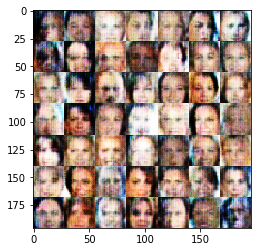

Epoch 1/1... Discriminator Loss: 1.5518... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.5622... Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.4662... Generator Loss: 0.7324
Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.7977
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.7494
Epoch 1/1... Discriminator Loss: 1.4586... Generator Loss: 0.7895
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.8218
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.8186
Epoch 1/1... Discriminator Loss: 1.4049... Generator Loss: 0.7267
Epoch 1/1... Discriminator Loss: 1.4453... Generator Loss: 0.7127


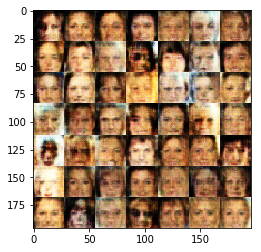

Epoch 1/1... Discriminator Loss: 1.4563... Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.7876
Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.8382
Epoch 1/1... Discriminator Loss: 1.4033... Generator Loss: 0.7356
Epoch 1/1... Discriminator Loss: 1.4080... Generator Loss: 0.7459
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 1.4481... Generator Loss: 0.9821
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.4243... Generator Loss: 0.6824


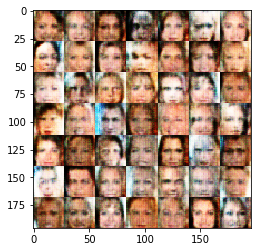

Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.8286
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.7719
Epoch 1/1... Discriminator Loss: 1.4458... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.8522
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.7502
Epoch 1/1... Discriminator Loss: 1.4820... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 1.4294... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.4483... Generator Loss: 0.7340
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.7472


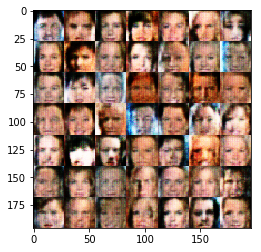

Epoch 1/1... Discriminator Loss: 1.4664... Generator Loss: 0.7486
Epoch 1/1... Discriminator Loss: 1.3837... Generator Loss: 0.7756
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.8419
Epoch 1/1... Discriminator Loss: 1.4370... Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.5330... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.6598
Epoch 1/1... Discriminator Loss: 1.4804... Generator Loss: 0.8490
Epoch 1/1... Discriminator Loss: 1.4721... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.7821


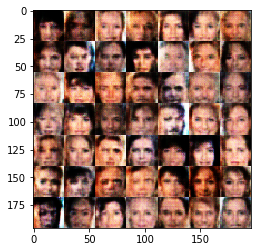

Epoch 1/1... Discriminator Loss: 1.3977... Generator Loss: 0.7329
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 0.7519
Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 0.7530
Epoch 1/1... Discriminator Loss: 1.4029... Generator Loss: 0.9022
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7904
Epoch 1/1... Discriminator Loss: 1.4424... Generator Loss: 0.6593
Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.8162
Epoch 1/1... Discriminator Loss: 1.4933... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.7377


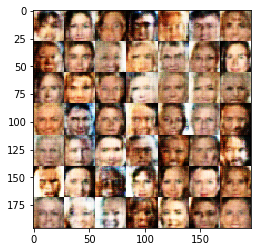

Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 0.8024
Epoch 1/1... Discriminator Loss: 1.4380... Generator Loss: 0.8520
Epoch 1/1... Discriminator Loss: 1.4318... Generator Loss: 0.7394
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.7310
Epoch 1/1... Discriminator Loss: 1.4168... Generator Loss: 0.7015
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.7492
Epoch 1/1... Discriminator Loss: 1.4668... Generator Loss: 0.6960
Epoch 1/1... Discriminator Loss: 1.4063... Generator Loss: 0.8041
Epoch 1/1... Discriminator Loss: 1.4481... Generator Loss: 0.7671


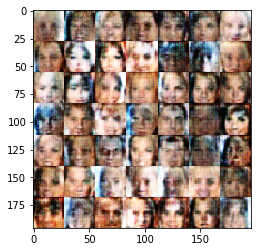

Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.7725
Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 0.7439
Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.7929
Epoch 1/1... Discriminator Loss: 1.4901... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 1.4516... Generator Loss: 0.8041
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.8627
Epoch 1/1... Discriminator Loss: 1.3846... Generator Loss: 0.7756
Epoch 1/1... Discriminator Loss: 1.4455... Generator Loss: 0.7447
Epoch 1/1... Discriminator Loss: 1.4599... Generator Loss: 0.6732
Epoch 1/1... Discriminator Loss: 1.4800... Generator Loss: 0.7801


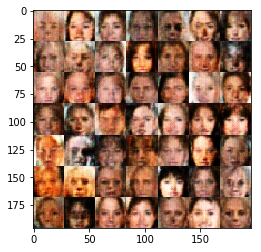

Epoch 1/1... Discriminator Loss: 1.4601... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 0.8350
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 1.4380... Generator Loss: 0.7713
Epoch 1/1... Discriminator Loss: 1.4345... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.4564... Generator Loss: 0.7782
Epoch 1/1... Discriminator Loss: 1.4440... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.7527
Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.8386


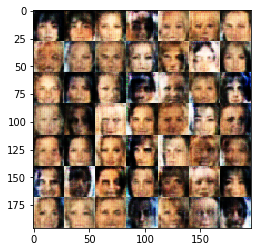

Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 1.4572... Generator Loss: 0.7178
Epoch 1/1... Discriminator Loss: 1.4476... Generator Loss: 0.8128
Epoch 1/1... Discriminator Loss: 1.5075... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.4806... Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 1.4355... Generator Loss: 0.7578
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.7409
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.7708
Epoch 1/1... Discriminator Loss: 1.4699... Generator Loss: 0.6721


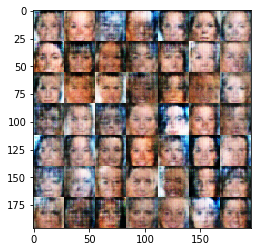

Epoch 1/1... Discriminator Loss: 1.4637... Generator Loss: 0.6628
Epoch 1/1... Discriminator Loss: 1.4265... Generator Loss: 0.8240
Epoch 1/1... Discriminator Loss: 1.3967... Generator Loss: 0.7817
Epoch 1/1... Discriminator Loss: 1.4608... Generator Loss: 0.7069
Epoch 1/1... Discriminator Loss: 1.4014... Generator Loss: 0.7817
Epoch 1/1... Discriminator Loss: 1.4049... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.7763
Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.7603
Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.8269
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.7356


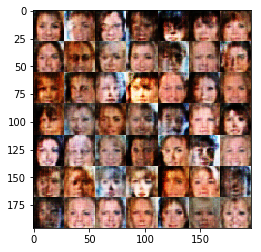

KeyboardInterrupt: 

In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.